In [38]:
library(tidymodels)
library(tidyverse)
library(gridExtra)
players_file=read_csv("data/players.csv")
players_file

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


**Predicting Minecraft Player Experience Based on Age and Played Hours**

# Introduction

## Background

Frank Wood directs a study project at the University of British Columbia that collects behavioural data from online Minecraft players.  The goal of this research is to better analyze player behaviour in order to optimize recruitment efforts and manage server resources more efficiently.

One key challenge is identifying which players are likely to contribute large amounts of gameplay data, which usually correlates with higher levels of engagement and experience.

## Research Question

Can a player's **total played hours** and **age** be used to predict their level of experience?

## Dataset Description

We use two datasets:
- **players.csv** — contains individual player information
- **sessions.csv** — contains individual session information

For this project, we focus on `players.csv` since it includes:
- `experience` (categorical; response variable)
- `played_hours` (numeric; explanatory variable)
- `Age` (numeric; explanatory variable)

Summary of variables:


| Variable | Type | Description |
| -------- | ---- | ----------- |
| experience | Categorical (Low, Medium, High) | Player experience level |
| played_hours | Numeric | Total number of hours the player spent playing |
| Age | Numeric | Player's age |

In [39]:
selected_file=select(players_file, experience,played_hours,Age)
selected_file

experience,played_hours,Age
<chr>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.0,17
Regular,0.0,19
Amateur,0.0,21
Amateur,0.1,17


In [40]:
#identify that experience is a categorical value
selected_file=selected_file|>
mutate(experience=as_factor(experience))
glimpse(selected_file)
# Check for missing values
colSums(is.na(selected_file))

Rows: 196
Columns: 3
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


experience played_hours          Age 
           0            0            2

Next, to visualize the relationships between variables, i will be creating 2 plots. One for played hours vs time, and the other is Age Vs experience

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


List of 136
 $ line                            :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                            :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                            :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: l

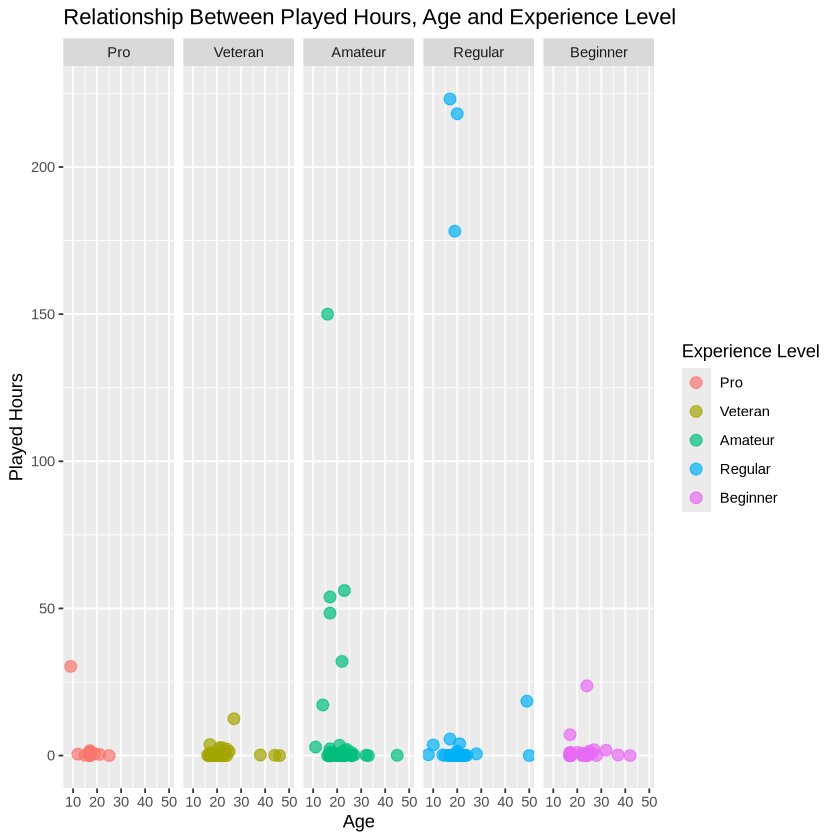

In [41]:
# Scatterplot to visualize the relationship between played_hours and Age colored by 
ggplot(selected_file, aes(y = played_hours, x= Age, color = experience)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(
    title = "Relationship Between Played Hours, Age and Experience Level",
    y = "Played Hours",
    x= "Age",
    color = "Experience Level") + facet_grid(. ~ experience)
  theme_minimal() +
  theme(legend.position = "bottom")


**Figure 1:** The scatter plot from the full dataset shows the relationship between played hours (y-axis) and age (x-axis), with each point colored based on the player’s reported experience level. One can observe from the graph that regardless of age, the majority of players have very low played hours as one can most clusters near zero. There is no visible linear or non-linear relationship between age and experience level. Players of all experience types are spread across the age range.

experience,n,percent
<fct>,<int>,<dbl>
Pro,8,5.555556
Veteran,36,25.000000
Amateur,47,32.638889
Regular,28,19.444444
Beginner,25,17.361111


experience,n,percent
<fct>,<int>,<dbl>
Pro,6,11.53846
Veteran,12,23.07692
Amateur,16,30.76923
Regular,8,15.38462
Beginner,10,19.23077


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


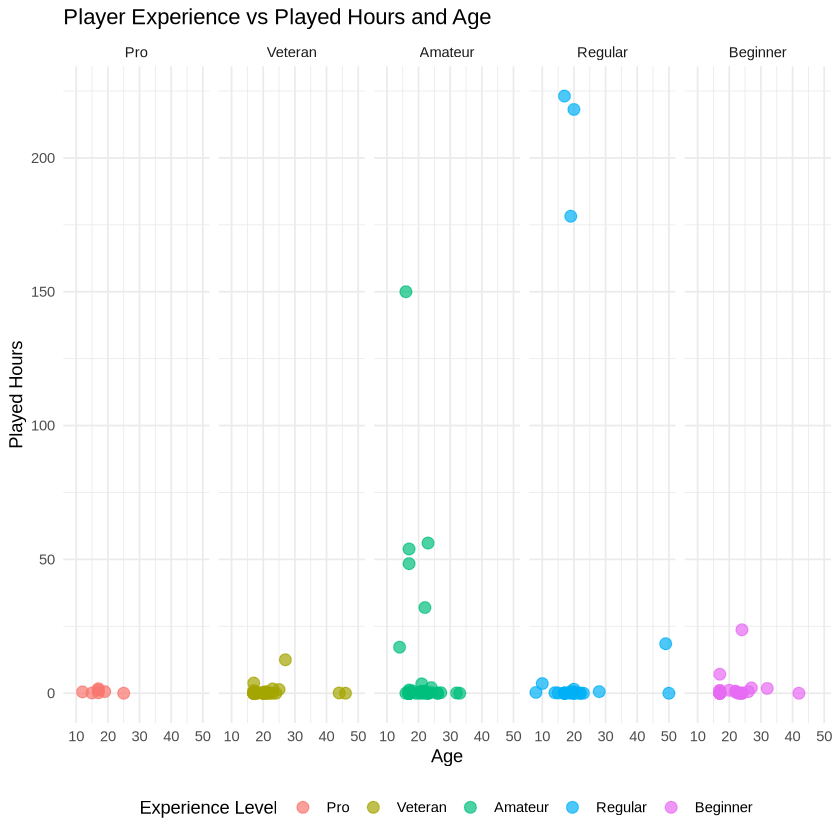

In [42]:
set.seed(123)
split_file <- initial_split(selected_file, prop = 0.75, strata = experience)
training_set <- training(split_file)
test_set <- testing(split_file)

# Checking proportions in training set
training_set |>
  group_by(experience) |>
  summarize(n = n()) |>
  mutate(percent = 100 * n / nrow(training_set))


# Checking proportions in test set
test_set %>%
  group_by(experience) |>
  summarize(n = n()) |>
  mutate(percent = 100 * n / nrow(test_set))




# Scatterplot of Played Hours vs Age colored by Experience Level (training set)
ggplot(training_set, aes(y = played_hours, x = Age, color = experience)) +
  geom_point(alpha = 0.7, size = 3) +
  labs(
    title = "Player Experience vs Played Hours and Age",
    y  = "Played Hours",
    x = "Age",
    color = "Experience Level"
  ) +facet_grid(. ~ experience)+
  theme_minimal() +
  theme(legend.position = "bottom")

**Figure 2:** The scatter plot from the training dataset shows the relationship between played hours (y-axis) and age (x-axis), with each point colored based on the player’s reported experience level. One can observe from the graph that regardless of age, the majority of players have very low played hours as one can most clusters near zero. There is **no visible linear or non-linear relationship** between age and experience level. Players of all experience types are spread across the age range. Each facet shows how age and played hours are distributed within a specific experience level.

In [43]:
# Create recipe (standardizing too)
training_recipe <- recipe(experience ~ played_hours + Age, data = training_set) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

### Model Justification

To predict player experience levels based on their age and total played hours, we selected the **K-Nearest Neighbors (KNN)** classification algorithm.

**Why KNN?**  
KNN is a simple, non-parametric method that classifies observations based on the experience levels of the nearest neighbors in the feature space. We chose it for this project because:
- The relationship between age, played hours, and experience might be complex or non-linear.
- KNN doesn’t require strong assumptions about how the data is distributed.
- Our dataset is small (fewer than 200 observations), so KNN is efficient and easy to apply.

**Why not other models?**  
- Linear regression** is not suitable here because our response variable (`experience`) is categorical, not numeric. Regression predicts a numerical value. 
- Clustering methods like k-means are unsupervised, meaning they group data based on internal patterns without using labeled output. In this project, we already have labeled experience levels, so we need a **supervised** classification method instead.

**Assumptions of KNN:**
- Feature scaling is important because KNN relies on distance calculations (e.g., Euclidean). Without scaling, variables with larger ranges would dominate the distance measure.
- The data should be embedded in a meaningful metric space, where distances between points correlate with similarity.
- KNN assumes that nearby points belong to similar classes

**Limitations:**
- KNN can be sensitive to outliers, which might mislead classification.
- KNN performance depends on choosing the optimal `k` value, which is why we used cross-validation to tune it.

**Evaluation Metric:**
We used accuracy as the main evaluation metric because the classes are relatively balanced. However, if one class were significantly more common, we would consider other metrics like precision or recall. We also used a confusion matrix to evaluate how well the model performed across each experience level.


→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 30 rows.
               ✖ Assigned data has 31 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 31 to size 30.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 27 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 27 to size 26.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





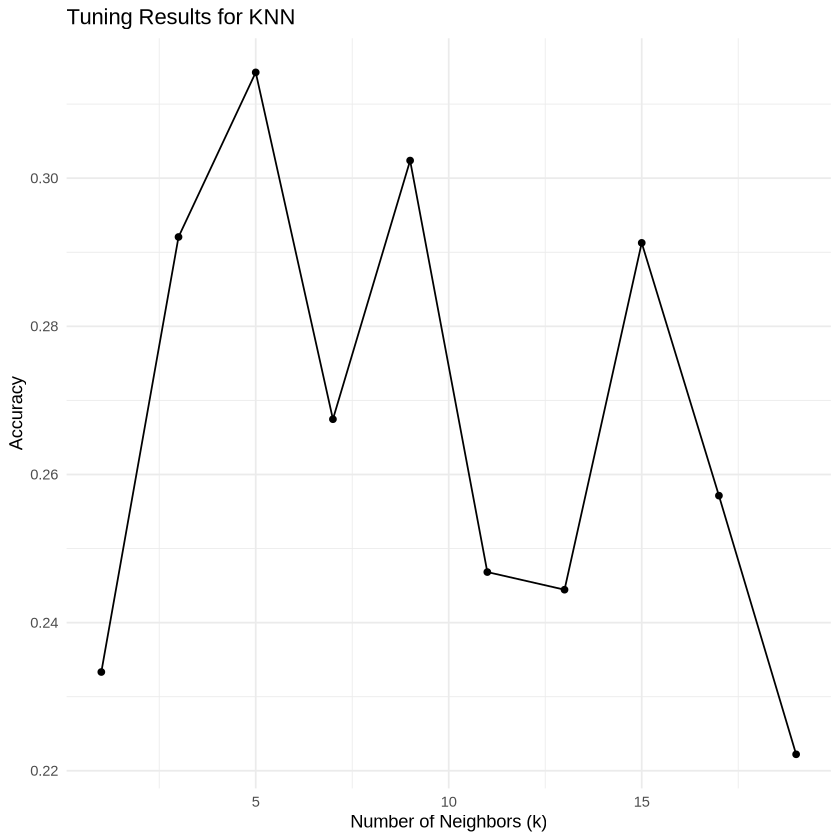

In [44]:
# create model
knn_spec <- nearest_neighbor(neighbors = tune(), weight_func = "rectangular") |>
  set_engine("kknn") |>
  set_mode("classification")

# Create 5-fold cross-validation folds
set.seed(123)
folds <- vfold_cv(training_set, v = 5, strata = experience)

# Combine recipe and model into workflow
workflow_model <- workflow() |>
  add_recipe(training_recipe) |>
  add_model(knn_spec)

# Define grid of k values to test
grid_values <- tibble(neighbors = seq(1, 20, by = 2))

#  tuning
tune_results <- tune_grid(object = workflow_model,
                          resamples = folds,
  grid = grid_values,
  metrics = metric_set(accuracy))


#  results
tune_results |>
  collect_metrics() |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(title = "Tuning Results for KNN", x = "Number of Neighbors (k)", y = "Accuracy") +
  theme_minimal()




**Figure 3:** Accuracy values from cross-validation to tune the number of neighbors (k) in the KNN classifier. On the graph, it can be seen that the highest accuracy accurs when k=5.

In [45]:
# Select best k value based on highest accuracy
best_k <- tune_results |>
select_best(metric = "accuracy")
best_k

neighbors,.config
<dbl>,<chr>
5,Preprocessor1_Model03


In [46]:

final_knn <- finalize_workflow(workflow_model, best_k)

# Fit final model on training set
final_fit <- final_knn |>
fit(data = training_set)
final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.6478873
Best kernel: rectangular
Best k: 5

Starting to work on the test set

In [47]:
# Make predictions on test set
test_predictions <-
predict(final_fit, new_data = test_set) |>
  bind_cols(test_set)

# Evaluate metrics
test_predictions |>
  metrics(truth = experience, estimate = .pred_class)



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.19230769
kap,multiclass,-0.07692308


In [48]:
# Confusion matrix
test_predictions |>
  conf_mat(truth = experience, estimate = .pred_class)

          Truth
Prediction Pro Veteran Amateur Regular Beginner
  Pro        0       0       1       1        0
  Veteran    1       0       3       3        0
  Amateur    3       7       8       3        7
  Regular    1       3       4       0        1
  Beginner   1       2       0       1        2

**Figure 4:** Confusion matrix heatmap showing classification results on the test set.

### Discussion

Our KNN classification model was built to predict a player's experience level (Beginner, Regular, Amateur, Veteran, Pro) based on two features: total played hours and age. We tuned the number of neighbors using cross-validation and evaluated the model on a test set using a confusion matrix and performance metrics.

Unfortunately, the model performed poorly. The confusion matrix (Figure 4) showed that the model made only 10 correct predictions out of 52, resulting in an **accuracy of 19.2%**, which is significantly worse than random guessing. With five possible experience levels, a random model would be expected to achieve roughly 20% accuracy, and our model only barely matched that. This may mean that the model is preforming worse than chance. 

When we looked at **precision** for each predicted class, the results were similarly disappointing:
- **Beginner:** 33.3%
- **Amateur:** 28.6%
- **Pro, Veteran, Regular:** 0%

This means that when the model predicted “Beginner,” it was right only one-third of the time. When it predicted “Pro,” “Veteran,” or “Regular,” it was *never* correct. The model predicted “Amateur” more than any other class, but even those predictions were correct less than 30% of the time.

Looking at the scatterplots (Figures 1 and 2), we observed a striking pattern: **most players had total played hours near zero**. This clustering shows that a majority of users likely only joined the server briefly or never meaningfully engaged with the game. These players are probably classified as beginners, which may explain why the model tends to favor the "Amateur" or "Beginner" categories. However, the overlap between classes in this low-playtime region makes it nearly impossible to distinguish between experience levels using only these two features.

There was also **no clear relationship between age and played hours**. Players of all experience levels were scattered across a wide range of ages, and most had very low played hours regardless of their age. These visual patterns confirm that **age and played hours alone are not good predictors** of experience in this dataset.

Another major limitation of our analysis was that we **did not use repeated resampling or bootstrapping**. We performed only a single train-test split (75/25), which may have introduced bias or instability into our evaluation. In small datasets like this one (196 rows), the choice of test set can dramatically affect results, especially if some experience levels are underrepresented. Without repeating the train-test split multiple times, we can't be confident that our reported accuracy and precision reflect the true performance of the model.

We chose not to do repeated resampling for several reasons:
- The dataset was small, and repeated splitting could result in training sets that are too small or unbalanced.
- We used 5-fold cross-validation during tuning, which provided some measure of robustness.
- The project required a single, reproducible pipeline with limited runtime, and resampling would increase complexity and time.

Despite these limitations, the results offer valuable insights for the Minecraft research team. The large group of players with nearly zero played hours suggests that many users are only briefly testing the server, rather than actively participating. This may help the team re-evaluate how players are recruited or encouraged to stay engaged. For instance, tracking specific in-game behaviors could be used to filter out passive players and focus on those more likely to contribute meaningful data.

###  Future Questions

To improve prediction, we suggest the following:
- **Add more behavioral variables**, such as the number of sessions, average session duration, in-game actions taken, or progression milestones.
- **Perform repeated train-test splits or bootstrapping** to get more reliable estimates of model performance.

To summarize, while this project revealed some of the challenges in modeling player experience using basic demographic and playtime features, it also demonstrated the importance of thoughtful data collection. 
